In [2]:
def plot_figures(opt_names, model_params):
    plt.figure(figsize=(15,5))
    for opt_name in opt_names:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_params[opt_name])

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')
    
    plt.legend(opt_names)
    plt.tight_layout()
    plt.show()
    

In [4]:
def plot_figures_goldstein(gold_deltas):
    plt.figure(figsize=(15,5))
    for gold_delta in gold_deltas:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, gold_delta=gold_delta)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.plot(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

In [3]:
def plot_figures_rhos(rhos, model_params):
    plt.figure(figsize=(15,5))
    for rho in rhos:
        model_param = model_params[rho]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

def plot_figures_lrs(lrs, model_params):
    plt.figure(figsize=(15,5))
    for lr in lrs:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_params[lr])

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.tight_layout()
    plt.show()

def plot_figures_opts(opts, model_params):
    plt.figure(figsize=(15,5))
    for opt_name in opts:
        model_param = model_params[opt_name]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        print(train_graphs.eigs)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        print(train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(opts)
    plt.tight_layout()
    plt.show()

In [4]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sgd --lr 0.01 --epoch 2000 --analysis loss eigs --batch_size 128 --sp_train_size 512

### Observation: feat size = 50 sam doesn't work! feat_size = 20 works.

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.002/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.02/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.2/lr_0.01/wd_0/batch_size_128/epoch_4000/


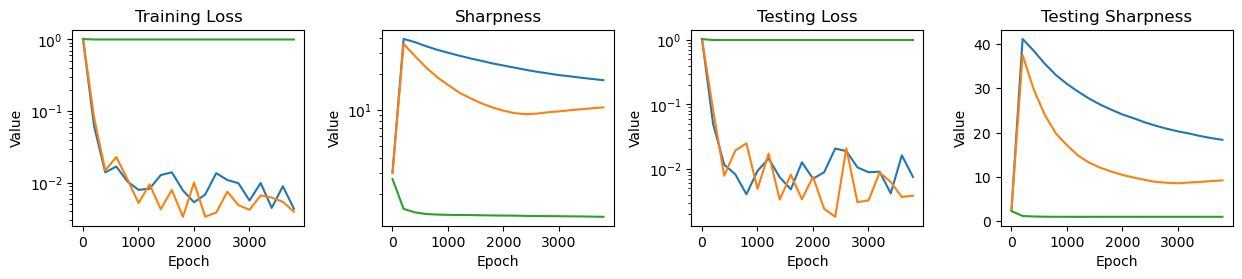

In [17]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.002] = {"feat_dim":50, "train_size": 512, "sam_rho":0.002}
model_params[0.02] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params[0.2] = {"feat_dim":50, "train_size": 512, "sam_rho":0.2}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_rhos([0.002, 0.02, 0.2], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 128 --sp_train_size 512 --sp_feat_dim 20 --sam_rho 0.2

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_512/sam_rho_0.02/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_512/lr_0.01/wd_0/batch_size_128/epoch_4000/
results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_512/lr_0.01/wd_0/batch_size_128/epoch_4000/


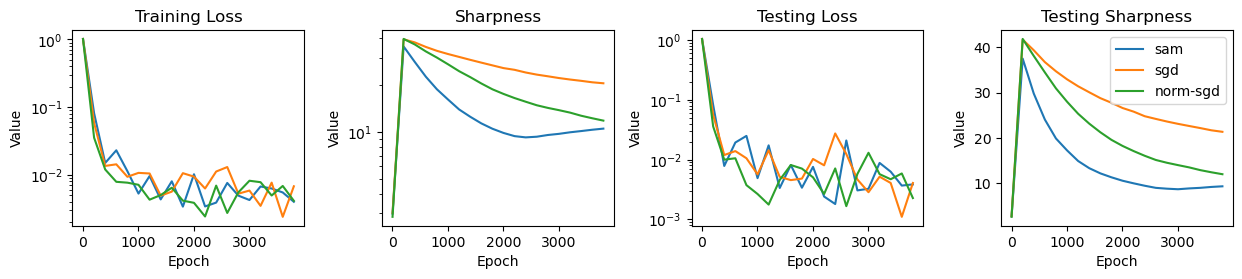

In [23]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": 512}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": 512}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

results/spurious/sam/2-mlp-sim-bn/feat_dim_50/train_size_128/sam_rho_0.02/lr_0.01/wd_0/batch_size_32/epoch_8000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_8000/
results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_8000/


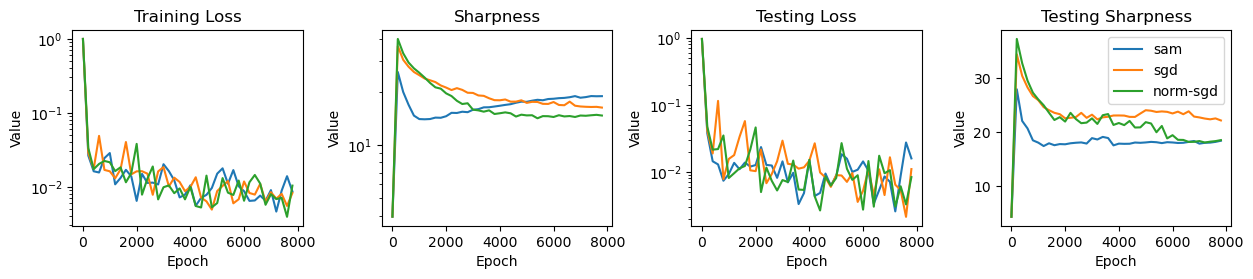

In [27]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 8000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

results/spurious/norm-sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.01/wd_0/batch_size_16/epoch_4000/
[39.949649810791016, 43.852989196777344, 40.2984733581543, 37.57691192626953, 35.40089797973633, 33.21664047241211, 31.18688201904297, 29.633535385131836, 28.112943649291992, 26.382658004760742, 25.311294555664062, 23.834346771240234, 22.76512336730957, 21.357240676879883, 20.421560287475586, 19.302064895629883, 18.40989112854004, 17.41108512878418, 16.72019386291504, 16.210697174072266]
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.01/wd_0/batch_size_16/epoch_4000/
[37.81936264038086, 36.933319091796875, 32.59858703613281, 30.490440368652344, 28.527904510498047, 26.590791702270508, 25.513586044311523, 24.113943099975586, 23.4771671295166, 22.866056442260742, 22.19025421142578, 21.755701065063477, 21.2637939453125, 20.527231216430664, 20.35502815246582, 20.06728172302246, 19.588193893432617, 19.403383255004883, 19.065288543701172, 18.98062515258789]
results/spuriou

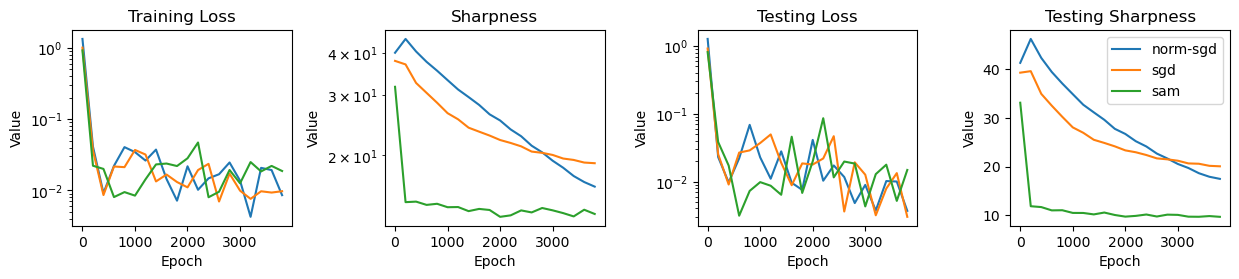

In [59]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 16, 64, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.0005/wd_0/batch_size_1/epoch_4000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.002/wd_0/batch_size_1/epoch_4000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.01/wd_0/batch_size_1/epoch_4000/
results/spurious/sgd/2-mlp-sim-bn/feat_dim_50/train_size_64/lr_0.02/wd_0/batch_size_1/epoch_4000/


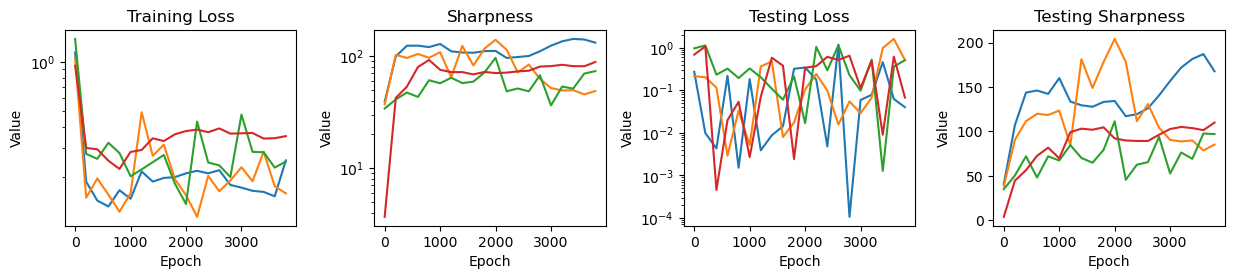

In [54]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sgd", 0, 1, 64, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.01] = {"feat_dim":50, "train_size": train_size}
model_params[0.02] = {"feat_dim":50,"train_size": train_size}
model_params[0.002] = {"feat_dim":50,"train_size": train_size}
model_params[0.0005] = {"feat_dim":50,"train_size": train_size}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_lrs([0.0005, 0.002, 0.01, 0.02], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 32 --sp_train_size 128 --sp_feat_dim 50 --sam_rho 0.2

results/spurious/norm-sgd/2-mlp-sim-ln/norm_lr_0.05/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_4000/
[36.84526062011719, 38.11470031738281, 35.264060974121094, 33.14055252075195, 31.305343627929688, 29.83806610107422, 28.524822235107422, 27.38252067565918, 26.298864364624023, 25.327890396118164, 24.452407836914062, 23.54087257385254, 22.61844825744629, 21.76057243347168, 20.928903579711914, 20.22134017944336, 19.487974166870117, 18.812589645385742, 18.099143981933594, 17.498363494873047]
[36.481510162353516, 40.059730529785156, 38.297401428222656, 37.07035827636719, 36.00770950317383, 35.2167854309082, 34.52678680419922, 33.94504928588867, 33.30055236816406, 32.7797737121582, 32.44706726074219, 32.0009880065918, 31.691730499267578, 31.380722045898438, 30.942522048950195, 30.660259246826172, 30.29014778137207, 30.063535690307617, 29.616201400756836, 29.393665313720703]
results/spurious/sgd/2-mlp-sim-ln/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_4000/
[3

/tmp/ipykernel_15616/4115207156.py:136: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


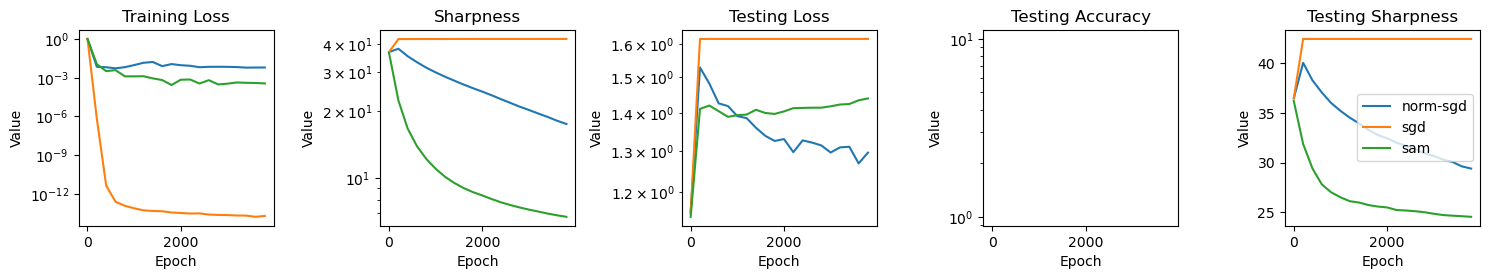

In [3]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
#model_params["sam-0.05"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"norm_lr": 0.05, "feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

results/spurious/norm-sgd/2-mlp-sim-ln/norm_lr_0.05/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_4000/
[36.84526062011719, 38.11470031738281, 35.264060974121094, 33.14055252075195, 31.305343627929688, 29.83806610107422, 28.524822235107422, 27.38252067565918, 26.298864364624023, 25.327890396118164, 24.452407836914062, 23.54087257385254, 22.61844825744629, 21.76057243347168, 20.928903579711914, 20.22134017944336, 19.487974166870117, 18.812589645385742, 18.099143981933594, 17.498363494873047]
[36.481510162353516, 40.059730529785156, 38.297401428222656, 37.07035827636719, 36.00770950317383, 35.2167854309082, 34.52678680419922, 33.94504928588867, 33.30055236816406, 32.7797737121582, 32.44706726074219, 32.0009880065918, 31.691730499267578, 31.380722045898438, 30.942522048950195, 30.660259246826172, 30.29014778137207, 30.063535690307617, 29.616201400756836, 29.393665313720703]
results/spurious/sgd/2-mlp-sim-ln/feat_dim_50/train_size_128/lr_0.01/wd_0/batch_size_32/epoch_4000/
[3

/tmp/ipykernel_21444/4115207156.py:136: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


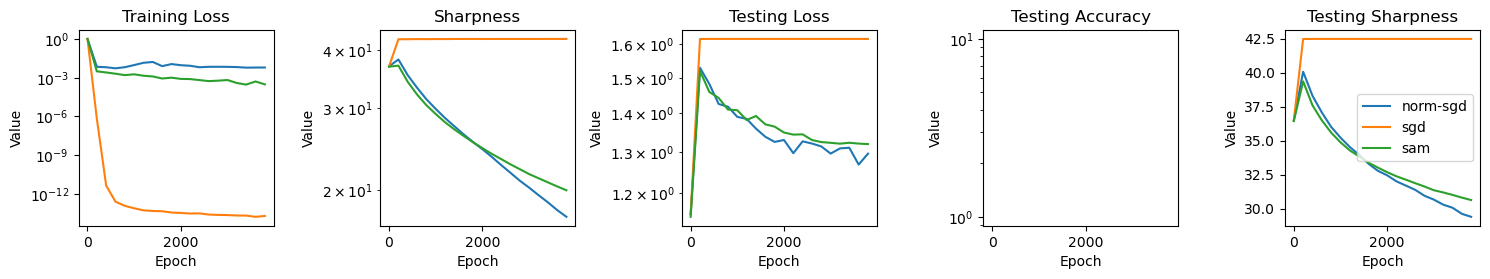

In [5]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"norm_lr": 0.05, "feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --sam_rho 0.05 --adv_eta 0.01

<class 'main.graphs'>
results/spurious/MSELoss/sam/2-mlp-sim-ln/feat_dim_30/train_size_512/sam_rho_0.05/lr_0.01/moment_0/wd_0/batch_size_64/epoch_4000/run_0/
[35.60421371459961, 35.64580535888672, 33.172420501708984, 31.421613693237305, 30.056903839111328, 28.891231536865234, 27.8297061920166, 26.977458953857422, 26.153717041015625, 25.46829605102539, 24.887205123901367, 24.32322120666504, 23.82579231262207, 23.40279197692871, 22.98971939086914, 22.644332885742188, 22.265865325927734, 21.93048858642578, 21.618820190429688, 21.34575843811035]
results/spurious/MSELoss/norm-sgd/2-mlp-sim-ln/norm_lr_0.05/feat_dim_30/train_size_512/lr_0.01/moment_0/wd_0/batch_size_64/epoch_4000/run_0/
[35.667022705078125, 37.901885986328125, 35.08314514160156, 33.17584991455078, 31.28726577758789, 29.89960289001465, 28.482173919677734, 27.226953506469727, 26.227628707885742, 25.317398071289062, 24.34479522705078, 23.627382278442383, 22.849512100219727, 22.14059829711914, 21.509620666503906, 20.9693412780761

/projects/dali/lucmon/mlopt/notebook/plot_functions.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


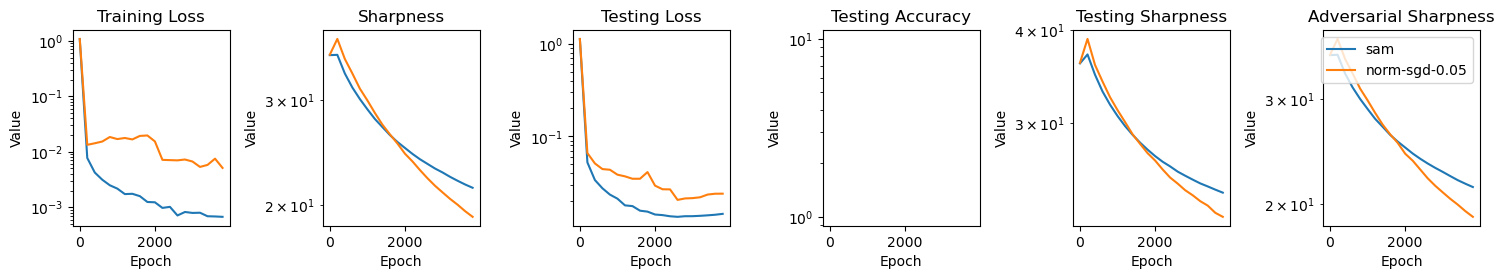

In [1]:
from plot_functions import plot_figures_opts
from main import graphs
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "MSELoss", "sam", 0, 0, 64, 512, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":30, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.05"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.05'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam", "norm-sgd-0.05"], model_params, opt_params)

results/cifar/norm-sgd/resnet18/norm_lr_0.001/lr_0.004/wd_0/batch_size_512/epoch_2000/
[80.48587799072266, 0.0071824947372078896, 0.0013094389578327537, 0.0011148098856210709, 0.016189003363251686, 0.0007315182592719793, 0.013360043987631798, 0.1230664774775505, 0.019037317484617233, 0.00020579247211571783]
[82.59756469726562, 9519.701171875, 6820.0439453125, 4890.14208984375, 7227.419921875, 8896.1083984375, 8541.8134765625, 9223.4306640625, 7567.17529296875, 9941.55859375]
results/cifar/sgd/resnet18/lr_0.004/wd_0/batch_size_512/epoch_2000/
[92.79298400878906, 9.349392890930176, 9.203051567077637, 8.017475128173828, 6.745639324188232, 5.337525844573975, 5.92470645904541, 4.714709758758545, 4.382450103759766, 4.557709217071533]
[85.45185852050781, 1199.81201171875, 1276.8243408203125, 1620.2535400390625, 1660.5299072265625, 1685.402099609375, 1760.6646728515625, 1810.9415283203125, 1895.3494873046875, 2104.462158203125]
results/cifar/sam/resnet18/sam_rho_0.02/lr_0.004/wd_0/batch_size_5

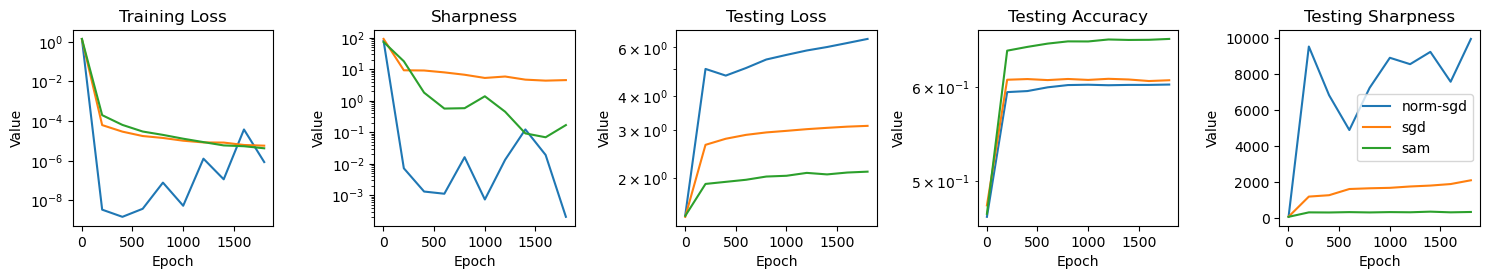

In [7]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.004, "cifar", "sam", 0, 512, 2000
model_name = "resnet18"
model_params = {}
model_params["sam"] = {"sam_rho":0.02}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["norm-sgd","sgd", "sam"], model_params)

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sam --lr 0.004 --epoch 2000 --analysis loss eigs --batch_size 512 --sam_rho 0.05 --weight_decay 0.0005

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 512 --sam_rho 0.05 --momentum 0.9
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt norm-sgd --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --momentum 0.9 --norm_sgd_lr 0.001
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --momentum 0.9 --base_opt adam --sam_rho 0.005 --sam_adaptive 1 --adv_eta 0.01

results/cifar/sam/WideResNet/sam_rho_0.05/lr_0.01/wd_0/batch_size_512/epoch_200/
[16.96464729309082, 29.96347427368164, 21.05882453918457, 10.022028923034668, 6.451640605926514, 2.9009015560150146, 2.9907567501068115, 1.7616939544677734, 1.4513888359069824, 1.0568034648895264, 0.6152250170707703, 0.575383722782135, 0.5660759806632996, 0.3468562364578247, 0.2935132682323456, 0.3298487365245819, 0.24906612932682037, 0.48672616481781006, 0.2379765808582306, 0.28270772099494934]
[16.002866744995117, 35.809906005859375, 152.97030639648438, 101.74678802490234, 147.43780517578125, 101.30989074707031, 106.93522644042969, 116.30288696289062, 124.18689727783203, 122.56014251708984, 118.54153442382812, 96.21751403808594, 102.39765930175781, 120.19316864013672, 121.46492767333984, 100.91015625, 130.92233276367188, 117.4241714477539, 111.70453643798828, 133.91168212890625]
results/cifar/sgd/WideResNet/lr_0.01/wd_0/batch_size_512/epoch_200/
[28.608753204345703, 111.62873840332031, 6.8797783851623535

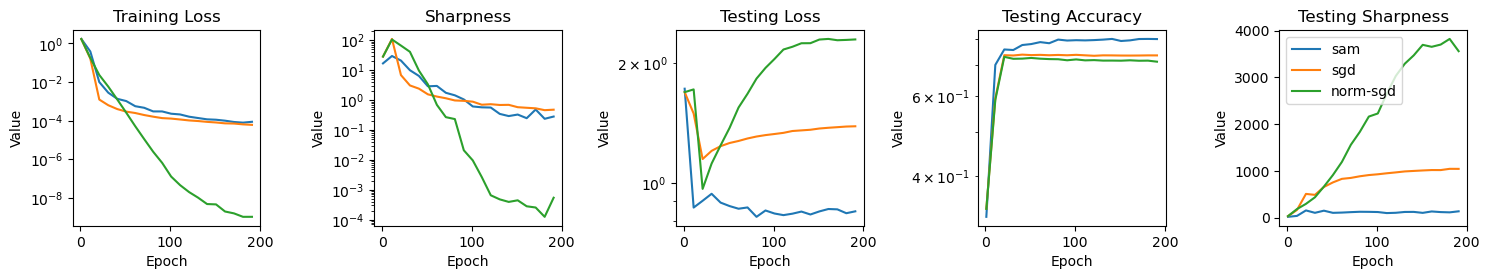

In [48]:
lr, dataset_name, loss_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "CrossEntropyLoss", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["sam","sgd", "norm-sgd"], model_params)

In [21]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0.0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width":width_factor, "base_opt": "adam","sam_rho":0.5}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["adam"] = {"width":width_factor}
model_params["norm-sgd"] = {"width":width_factor,"base_opt": "adam", "norm_lr": 0.01}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam", "norm-sgd"], model_params, opt_params)

results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_adam/sam_rho_0.5/lr_0.01/moment_0.9/wd_0.0/batch_size_512/epoch_200/run_0/


FileNotFoundError: [Errno 2] No such file or directory: '../results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_adam/sam_rho_0.5/lr_0.01/moment_0.9/wd_0.0/batch_size_512/epoch_200/run_0/train_graphs.pk'

<Figure size 1500x500 with 0 Axes>

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 128 --sam
_rho 0.1 --momentum 0.9 --weight_decay 0.0005 --adv_eta 0.01 --base_opt sgd

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1.2055932508850098, 0.07016963900327683, 0.0007813732454925776, 0.0011441252230107784, 0.0013283282642066478, 0.0014465609556436538, 0.001533722869157791, 0.2814863721847534, 0.023938492761850356, 0.005694784221053123, 0.010161324318051338, 0.014698246040046214, 0.013467921551764012, 0.01293713971912861, 0.012200901542007923, 0.02165194948256016, 0.010429557884931565, 0.003610264224857092, 0.0013851353539526463, 0.0016643096247315407]
[39.14076232910156, 103.09637451171875, 8.502711296081543, 6.199823379516602, 16.37366485595703, 20.291690826416016, 22.803987503051758, 42.773048400878906, 246.0928497314453, 266.5002746582031, 149.31565856933594, 123.67630767822266, 62.78852081298828, 70.53527069091797, 363.9463195800781, 182.4539031982422, 299.4475402832031, 25.400022506713867, 5.0650434494018555, 6.80013847351

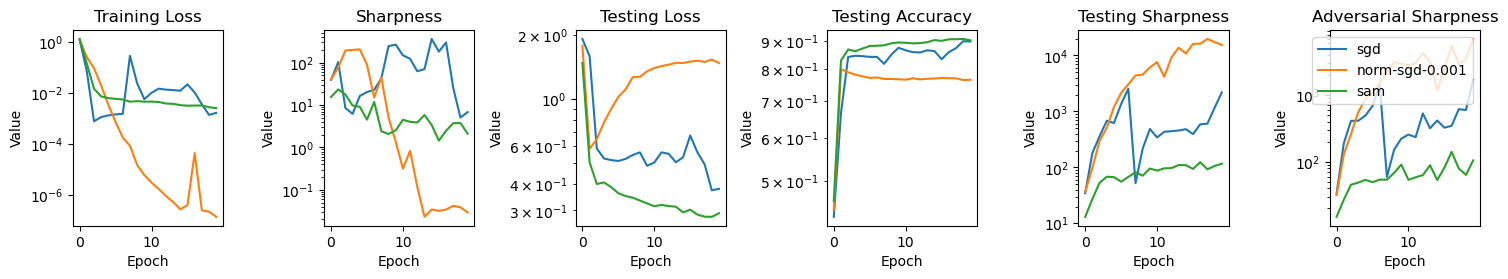

In [13]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0.0005, 128, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width_factor, "base_opt": "sgd","sam_rho":0.1}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["sgd"] = {"width": width_factor}
model_params["norm-sgd-0.001"] = {'width':width_factor, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':0.0005, 'batch_size':128, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "norm-sgd-0.001", "sam"], model_params, opt_params)

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --sam_rho 0.05 --momentum 0.9 --adv_eta 0.01

results/cifar/CrossEntropyLoss/norm-sgd/WideResNet/width_8/base_opt_adam/norm_lr_0.01/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1.7023204528808593, 0.2540686996459961, 0.026590345401763915, 0.020562631936073304, 0.021278866291046142, 0.011074291121959687, 0.01011459714949131, 0.004913447128087283, 0.007422610391229391, 0.010054917814582585, 0.004721611227914691, 0.007339366901367903, 0.005221133877187967, 0.0038651654331828466, 0.007198846875962336, 0.005401137638827786, 0.0036923158926976613, 0.0045993120838876255, 0.005476534094698141, 0.006836721996866118]
[35.089412689208984, 10.418364524841309, 3.130200147628784, 1.063535213470459, 1.8179479837417603, 1.6069612503051758, 0.766790509223938, 0.2294303923845291, 0.20578648149967194, 0.8418831825256348, 0.3083680272102356, 1.400209903717041, 0.6976132988929749, 0.008216717280447483, 0.263119101524353, 0.0024032210931181908, 0.06428250670433044, 0.695389032363

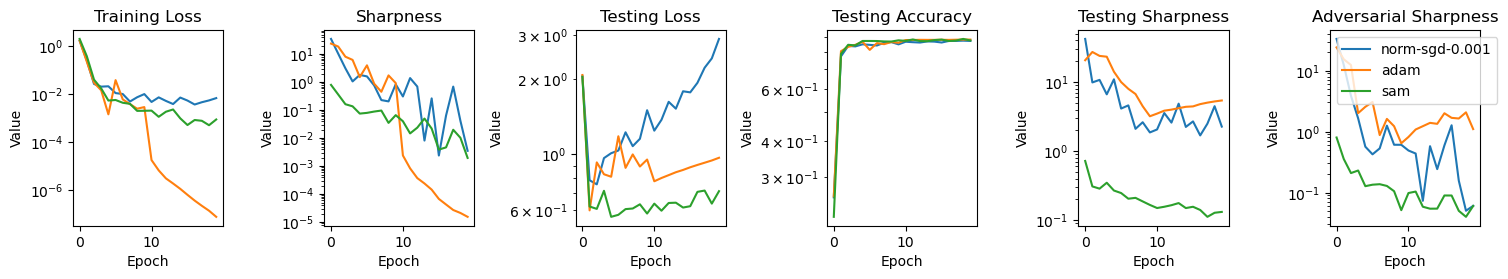

In [16]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width":width_factor, "base_opt": "adam","sam_rho":0.5}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["adam"] = {"width":width_factor}
model_params["norm-sgd-0.001"] = {"width":width_factor,"base_opt": "adam", "norm_lr": 0.01}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "adam", "sam"], model_params, opt_params)

results/cifar/CrossEntropyLoss/norm-sgd/WideResNet/base_opt_sgd/norm_lr_0.001/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1.6867550622558594, 0.17694751052856444, 0.02060995898246765, 0.004906965847015381, 0.001040569373369217, 0.00021914364397525787, 4.4908475168049335e-05, 9.21606855466962e-06, 1.9537194282747807e-06, 4.532825670321472e-07, 1.337046767002903e-07, 4.27364959159604e-08, 1.6689296328422642e-08, 8.38517803032346e-09, 5.352496052211109e-09, 3.6597238269564515e-09, 2.977847230312136e-09, 1.9812580718792106e-09, 2.1409956468687597e-09, 8.821485999987999e-10]
[28.45029640197754, 156.081298828125, 63.43772888183594, 34.92057800292969, 9.350590705871582, 2.228231191635132, 0.7198577523231506, 0.2653776705265045, 0.09318608045578003, 0.010381033644080162, 0.003387488890439272, 0.001780881080776453, 0.0010870128171518445, 0.0017997244140133262, 0.0010561126982793212, 0.00028470769757404923, 0.000377967080

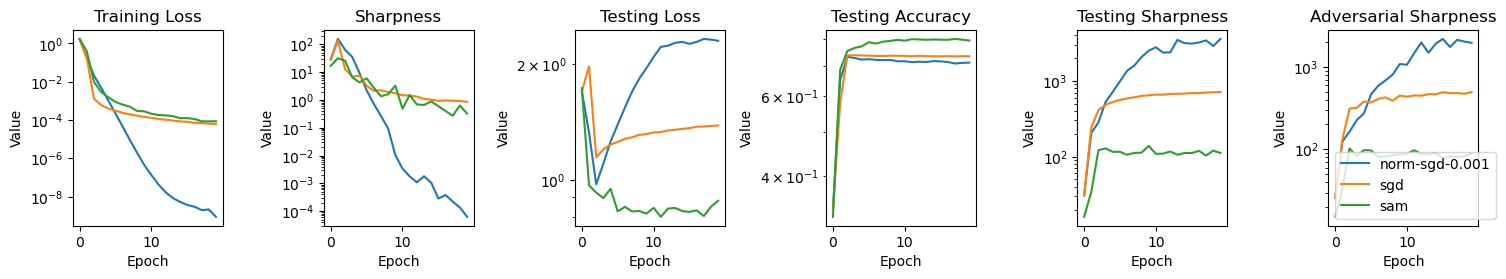

In [6]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"base_opt": "sgd","sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd-0.001"] = {"base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "sgd", "sam"], model_params, opt_params)

<class 'main.graphs'>
results/cifar/CrossEntropyLoss/norm-sgd/WideResNet/norm_lr_0.001/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
[28.45029640197754, 156.081298828125, 63.43772888183594, 34.92057800292969, 9.350590705871582, 2.228231191635132, 0.7198577523231506, 0.2653776705265045, 0.09318608045578003, 0.010381033644080162, 0.003387488890439272, 0.001780881080776453, 0.0010870128171518445, 0.0017997244140133262, 0.0010561126982793212, 0.00028470769757404923, 0.0003779670805670321, 0.00022137659834697843, 0.00013469239638652653, 6.23951418674551e-05]
results/cifar/CrossEntropyLoss/sgd/WideResNet/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
[28.496170043945312, 137.07618713378906, 12.726916313171387, 6.831535816192627, 7.485642433166504, 3.2578063011169434, 2.113398313522339, 2.216547727584839, 1.9257574081420898, 1.7406346797943115, 1.4742130041122437, 1.4225610494613647, 1.3209571838378906, 1.086740493774414, 1.0253454446792603, 0.926246166229248, 0.95511287450

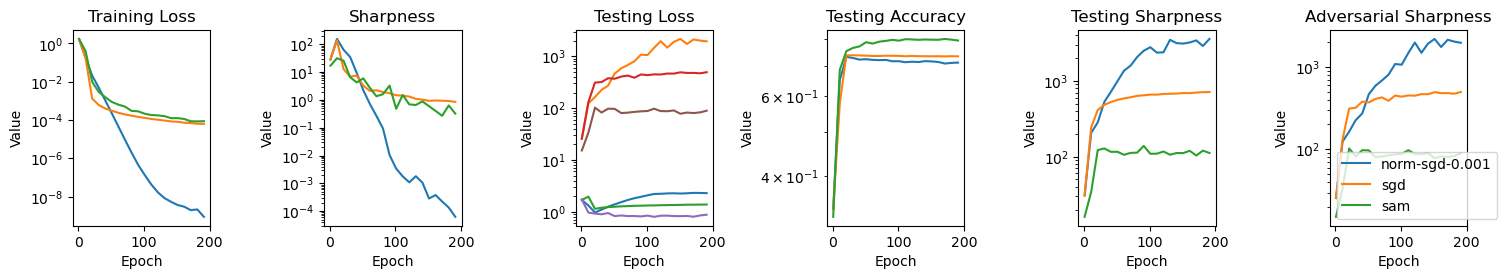

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd-0.001"] = {"norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "sgd", "sam"], model_params, opt_params)

In [ ]:
lr, dataset_name, loss_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "CrossEntropyLoss", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["sam","sgd", "norm-sgd"], model_params)

results/cifar/norm-sgd/WideResNet/lr_0.001/wd_0/batch_size_512/epoch_200/
[10.489164352416992, 138.7958221435547, 245.01808166503906, 405.74761962890625, 540.8917236328125, 636.4248046875, 886.5938720703125, 927.4878540039062, 1036.3662109375, 1303.7529296875]


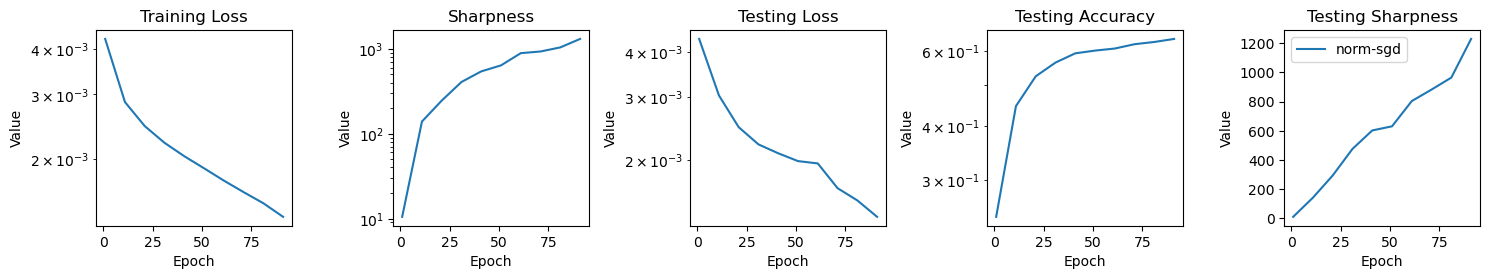

In [23]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.001, "cifar", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {}

plot_figures_opts(["norm-sgd"], model_params)

In [1]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --sam_rho 0.2
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt norm-sgd --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --norm_sgd_lr 0.05

results/spurious/MSELoss/norm-sgd/2-mlp-sim-ln/norm_lr_0.02/feat_dim_30/train_size_512/lr_0.01/moment_0/wd_0/batch_size_64/epoch_4000/run_0/
[35.667022705078125, 38.906394958496094, 38.37715148925781, 37.93818283081055, 37.47370147705078, 37.022212982177734, 36.525577545166016, 36.178627014160156, 35.732879638671875, 35.39606857299805, 35.04035186767578, 34.68779754638672, 34.354488372802734, 34.05635070800781, 33.72647476196289, 33.44766616821289, 33.126251220703125, 32.86534118652344, 32.52381134033203, 32.24802017211914]
[36.16318130493164, 39.94907760620117, 39.25114059448242, 38.804161071777344, 38.3553581237793, 37.88140869140625, 37.48828125, 37.11622619628906, 36.79212951660156, 36.42849349975586, 36.14599609375, 35.831275939941406, 35.50386047363281, 35.19618225097656, 34.899105072021484, 34.64118957519531, 34.33749771118164, 34.102718353271484, 33.805545806884766, 33.54607391357422]
results/spurious/MSELoss/norm-sgd/2-mlp-sim-ln/norm_lr_0.05/feat_dim_30/train_size_512/lr_0.01

/projects/dali/lucmon/mlopt/notebook/plot_functions.py:75: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


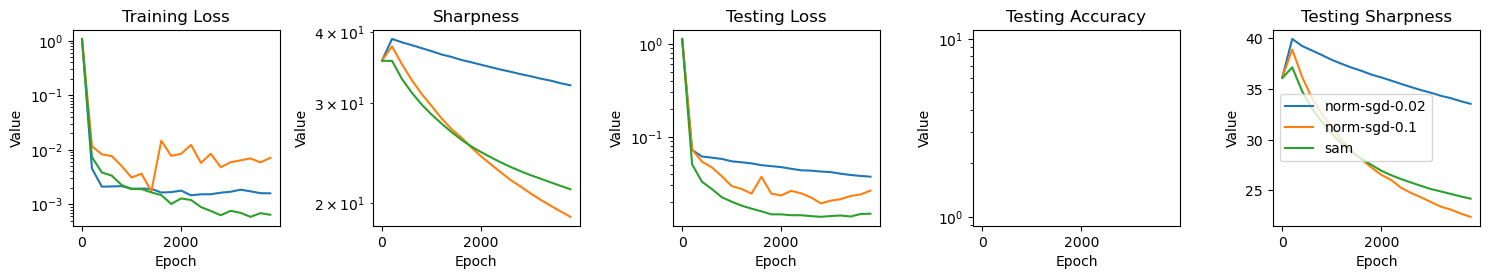

In [4]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", 'MSELoss', "sam", 0, 0, 64, 512, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":30, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.02"] = {"norm_lr": 0.02, "feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.02'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.02", "norm-sgd-0.1", "sam"], model_params, opt_params)

In [2]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --width 20 --sam_rho 0.05 --adv_eta 0.01

! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt norm-sgd --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --width 20 --norm_sgd_lr 0.001 --adv_eta 0.01 --base_opt sgd

results/spurious-2d/CrossEntropyLoss/sam/conv_fixed_last/nfilters_50/patch_dim_20/feat_dim_30/train_size_128/base_opt_sgd/sam_rho_0.05/lr_0.01/moment_0/wd_0/batch_size_64/epoch_4000/run_0/
[0.36835089325904846, 0.3839787244796753, 0.37789425253868103, 0.36677244305610657, 0.3567984700202942, 0.34845903515815735, 0.3406199812889099, 0.3340672254562378, 0.32850244641304016, 0.3234615623950958, 0.31854555010795593, 0.3136058747768402, 0.3091734051704407, 0.30510005354881287, 0.3011913299560547, 0.29752084612846375, 0.29407450556755066, 0.29067519307136536, 0.2872278690338135, 0.28365370631217957]
results/spurious-2d/CrossEntropyLoss/sgd/conv_fixed_last/nfilters_50/patch_dim_20/feat_dim_30/train_size_128/lr_0.01/moment_0/wd_0/batch_size_64/epoch_4000/run_0/
[0.3683484196662903, 0.3841847777366638, 0.3787502646446228, 0.36801084876060486, 0.35819101333618164, 0.3499596118927002, 0.34218963980674744, 0.33555951714515686, 0.32996776700019836, 0.32491335272789, 0.319989413022995, 0.31507790088

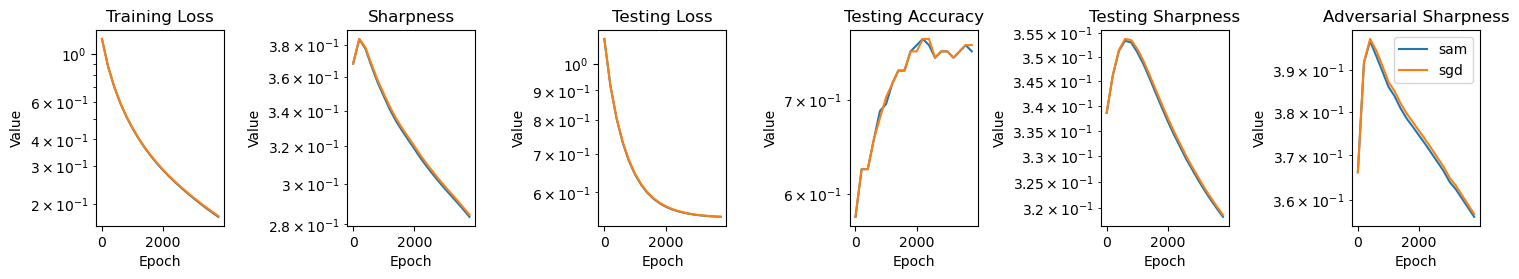

In [10]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'CrossEntropyLoss', 0, 0, 64, 4000
model_name = "conv_fixed_last"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128, "base_opt": "sgd", "sam_rho":0.05}
model_params["sgd"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128,}
model_params["norm-sgd"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128, "base_opt": "sgd", "norm_lr": 0.0001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam", "sgd"], model_params, opt_params)

In [ ]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --log_interval 10 --analysis loss eigs adv_eigs --batch_size 20 --sp_train_size 20 --sp_feat_dim 5000 --width 10 --sam_rho 0.05 --adv_eta 0.01

results/spurious-2d/CrossEntropyLoss/sgd/conv_fixed_last/nfilters_10/patch_dim_20/feat_dim_10000/train_size_20/lr_0.01/moment_0/wd_0/batch_size_20/epoch_200/run_0/
[7.222347736358643, 15.4658784866333, 13.769596099853516, 7.010925769805908, 4.1010518074035645, 2.905118942260742, 2.2512412071228027, 1.8383469581604004, 1.5540348291397095, 1.3459299802780151, 1.187072992324829, 1.0619062185287476, 0.9608203768730164, 0.8771206736564636, 0.8070927858352661, 0.7473440766334534, 0.6958863735198975, 0.6511129140853882, 0.611641526222229, 0.5767486095428467]
results/spurious-2d/CrossEntropyLoss/sam/conv_fixed_last/nfilters_10/patch_dim_20/feat_dim_10000/train_size_20/base_opt_sgd/sam_rho_0.05/lr_0.01/moment_0/wd_0/batch_size_20/epoch_200/run_0/
[7.222347736358643, 15.182433128356934, 10.327234268188477, 0.5154892206192017, 0.2932916581630707, 0.21502695977687836, 0.17220596969127655, 0.1444321572780609, 0.12472864985466003, 0.1098974198102951, 0.09834247082471848, 0.0890367403626442, 0.081331

/projects/dali/lucmon/mlopt/notebook/plot_functions.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


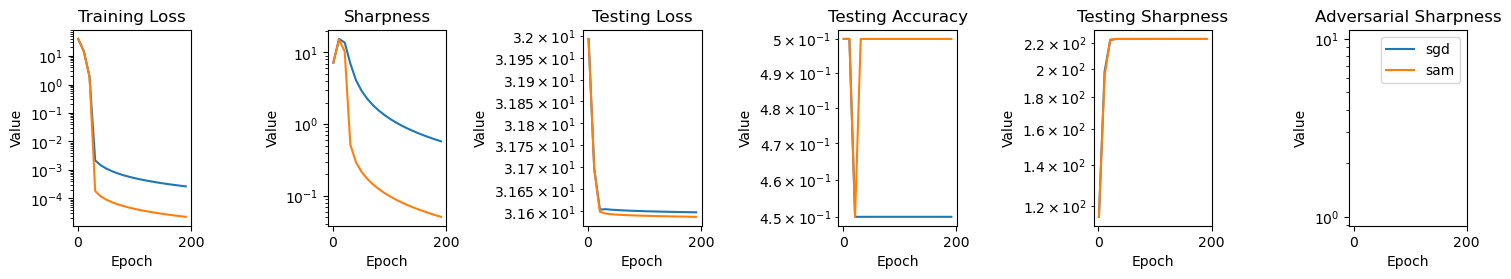

In [2]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'CrossEntropyLoss', 0, 0, 20, 200
model_name = "conv_fixed_last"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"nfilters":10, "patch_dim":20, "feat_dim":10000, "train_size": 20, "base_opt": "sgd", "sam_rho":0.05}
model_params["sgd"] = {"nfilters":10, "patch_dim":20, "feat_dim":10000, "train_size": 20,}
model_params["norm-sgd"] = {"nfilters":10, "patch_dim":20, "feat_dim":5000, "train_size": 20, "base_opt": "sgd", "norm_lr": 0.0001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "sam"], model_params, opt_params)

In [ ]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 5000 --log_interval 100 --analysis loss eigs adv_eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --width 10 --adv_eta 0.01 --run_from_scratch 1
! python main.py --dataset spurious-2d --model conv_fixed_last --loss BCELoss --opt norm-sgd --lr 0.01 --epoch 5000 --log_interval 100 --analysis loss eigs adv_eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --norm_sgd_lr 0.001 --width 10 --adv_eta 0.01 --run_from_scratch 1


results/spurious-2d/BCELoss/sam/conv_fixed_last/nfilters_10/patch_dim_20/feat_dim_200/train_size_100/base_opt_sgd/sam_rho_0.05/lr_0.01/moment_0/wd_0/batch_size_50/epoch_5000/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[0.710408821105957, 0.19867507934570314, 0.06513346433639526, 0.03162342309951782, 0.019333459734916687, 0.013417757749557495, 0.01005246490240097, 0.007932805418968202, 0.006494589149951935, 0.0054598584771156315, 0.004687047302722931, 0.004092756658792496, 0.0036221674084663392, 0.0032399116456508638, 0.00292447492480278, 0.0026599171757698058, 0.0024358294159173965, 0.002243238613009453, 0.002076730579137802, 0.0019308310002088547, 0.001802961677312851, 0.0016895295679569245, 0.00158849835395813, 0.0014980220794677734, 0.0014165431261062623, 0.0013429953157901764, 0.0012759538739919663, 0.001214638240635395, 0.0011585867777466775, 0.0011071944981813431, 

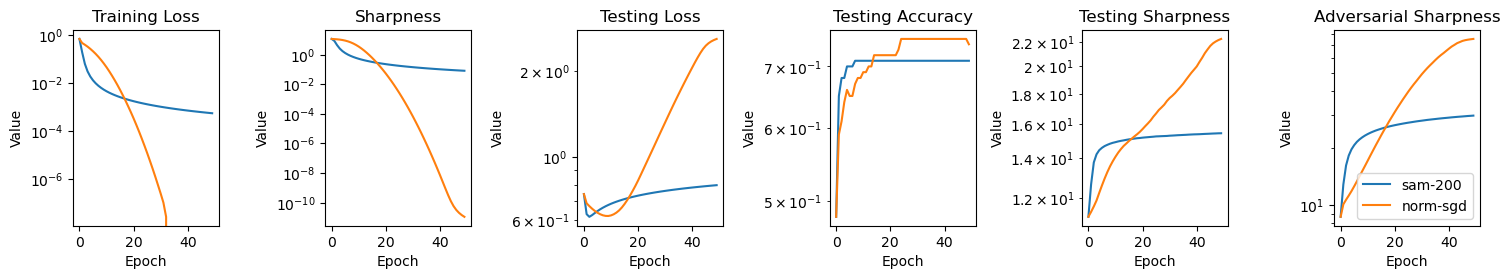

In [4]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'BCELoss', 0, 0, 50, 1000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 10, 20, 20, 100
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size,}
model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam-20'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam-200'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['sam-2000'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam-200","norm-sgd"], model_params, opt_params)

results/mrpc/CrossEntropyLoss/sgd/google-bert/bert-base-cased/lr_2e-05/moment_0/wd_0.0/batch_size_128/epoch_200/run_0/
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.008654419669928182, 0.007973845028435261, 0.007277015608815616, 0.0067216936121070135, 0.006182102220399039, 0.005758362043254898, 0.0054498168283356446, 0.005231003188644917, 0.005080573398908326, 0.00503533725975124, 0.004998730095418225, 0.004998980132678083, 0.0049986210098183406, 0.005014350136077781, 0.0050223934643921185, 0.004995215517613984, 0.0049855949899492505, 0.00500860556781357, 0.004992814253174752, 0.004996775995814033]
[245.24244689941406, 268.98590087890625, 297.9544372558594, 315.89154052734375, 333.08648681640625, 339.65472412109375, 344.1418151855469, 339.0107116699219, 327.95068359375, 316.9339599609375, 313.46624755859375, 305.3228454589844, 305.78082275390625, 302.134521484375, 302.17840576171875, 304.14862060546875, 303.6158142089844, 297.8719787597656, 304.1577453613281, 301.519

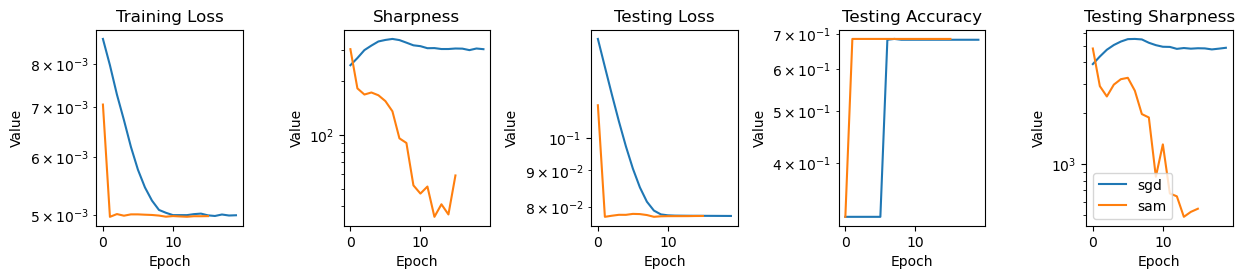

In [2]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 2e-5, "mrpc", 'CrossEntropyLoss', 0, 0.0, 128, 200
model_name = "google-bert/bert-base-cased"
model_params = {}
model_params["sam"] = {"base_opt": "sgd", "sam_rho":0.5}
model_params["sgd"] = {}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "sam"], model_params, opt_params)


In [ ]:
! python main.py --dataset multi-view --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 500 --log_interval 10 --analysis loss eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --width 10
! python main.py --dataset multi-view --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 500 --log_interval 10 --analysis loss eigs --batch_size 128 --sp_train_size 512 --sp_feat_dim 200 --width 500 --momentum 0.9

results/multi-view/BCELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.5/moment_0.9/wd_0/batch_size_128/epoch_2000/run_0/
results/multi-view/BCELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.5/moment_0.0/wd_0/batch_size_128/epoch_2000/run_0/
results/multi-view/BCELoss/sam/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/base_opt_sgd/sam_rho_0.5/lr_0.5/moment_0.0/wd_0/batch_size_128/epoch_2000/run_0/


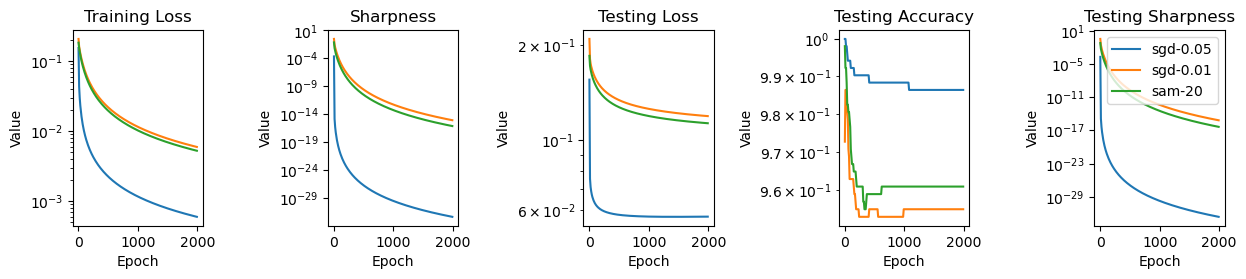

In [31]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'BCELoss', 0, 0, 128, 2000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.5}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.0, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam-20'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':0.0, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01", "sam-20"], model_params, opt_params)

results/multi-view/BCELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.1/moment_0/wd_0/batch_size_128/epoch_500/run_0/
results/multi-view/BCELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0/wd_0/batch_size_128/epoch_500/run_0/


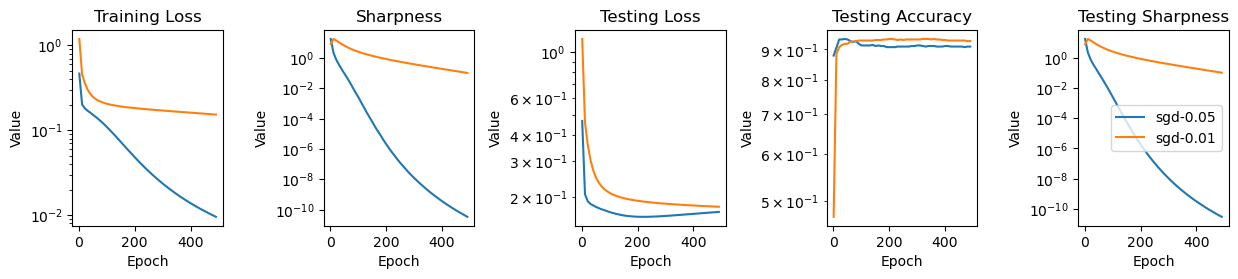

In [35]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'BCELoss', 0, 0, 128, 500
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.08/moment_0/wd_0/batch_size_512/epoch_500/run_0/
results/multi-view/MSELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.1/moment_0/wd_0/batch_size_512/epoch_500/run_0/


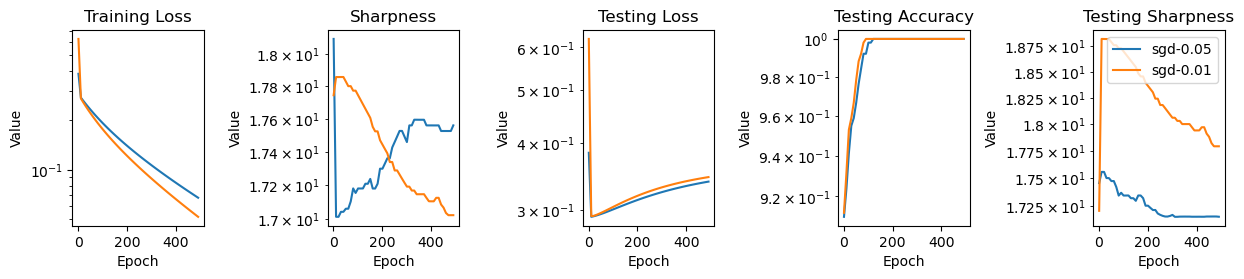

In [18]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 500
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.08, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/multi-view/MSELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.05/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_fixed_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.1/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


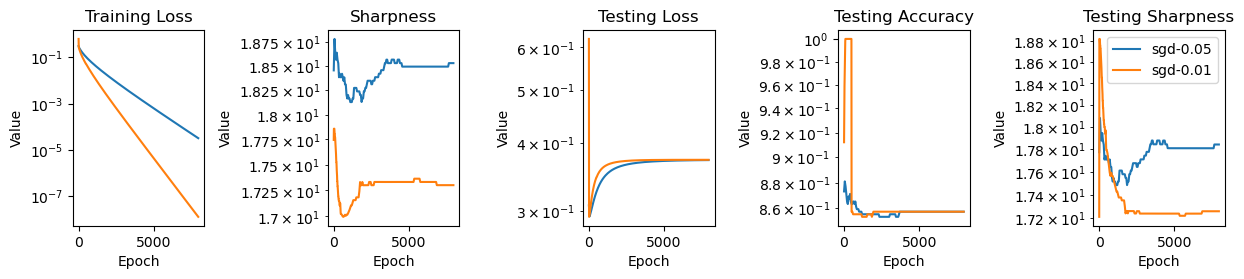

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.012 --epoch 8000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 500

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0/wd_0/batch_size_512/epoch_8000/run_0/
results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


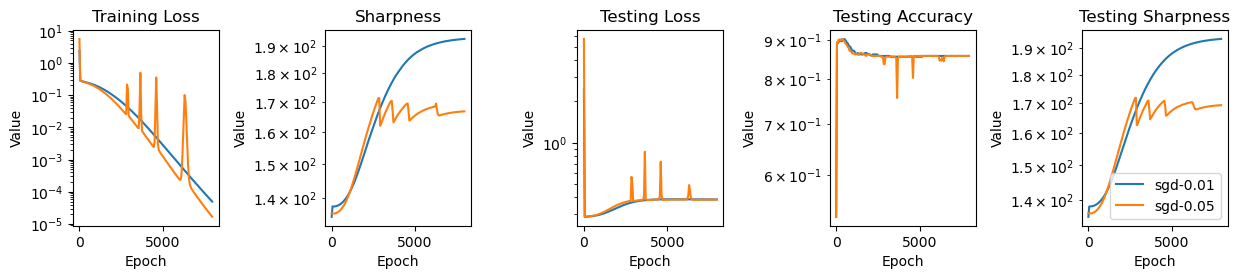

In [1]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.01/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


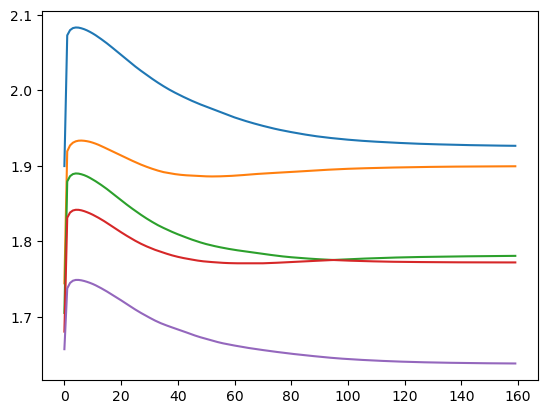

In [13]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.01', model_params, opt_params, "align")
plot_max_2d(align, 5)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


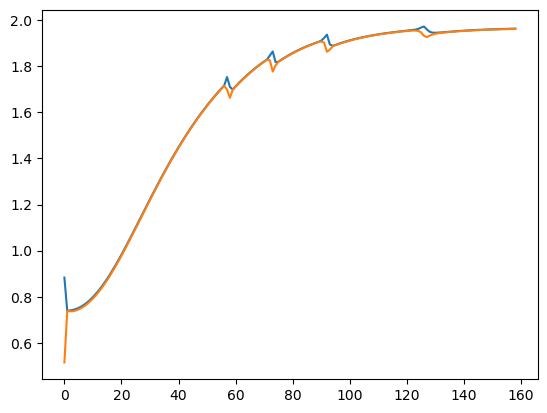

In [3]:
out_layer = get_attr('sgd-0.05', model_params, opt_params, "out_layer")
plot_max_2d(out_layer, 2)

results/multi-view/MSELoss/sgd/conv_with_last/nfilters_500/patch_dim_20/feat_dim_200/train_size_512/lr_0.012/moment_0/wd_0/batch_size_512/epoch_8000/run_0/


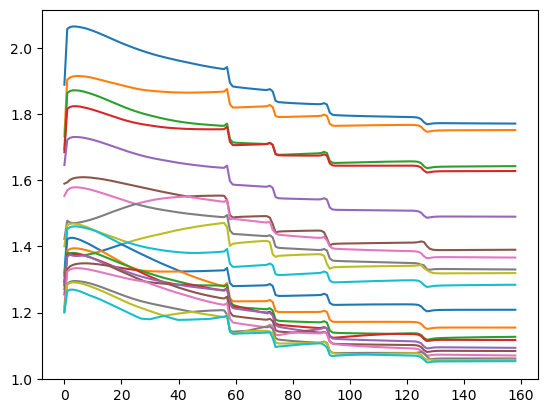

In [2]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.05', model_params, opt_params, "align")
plot_max_2d(align, 20)

[301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301]


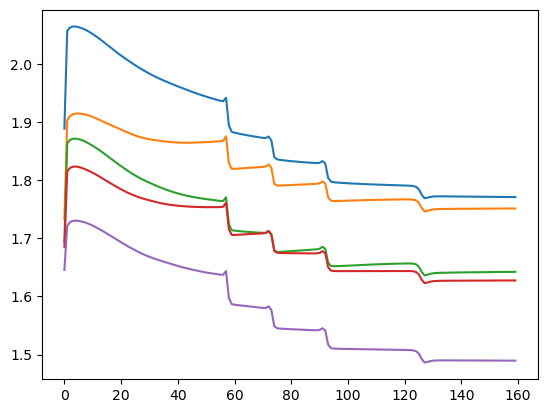

In [35]:
import numpy as np
plt.plot([np.max(align[i]) for i in range(len(align))])
print([np.argmax(align[i]) for i in range(len(align))])

plt.plot([np.partition(align[i].flatten(), -2)[-2] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -3)[-3] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -4)[-4] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -5)[-5] for i in range(len(align))])

[670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670, 670]


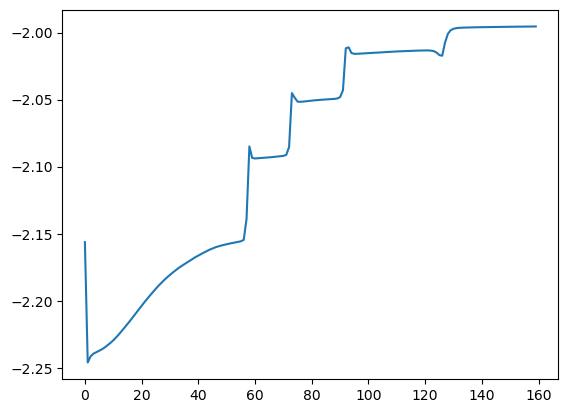

In [31]:
import numpy as np
plt.plot([np.min(align[i]) for i in range(len(align))])
print([np.argmin(align[i]) for i in range(len(align))])

(array([  3.,   9.,  29.,  96., 144., 494., 122.,  77.,  21.,   5.]),
 array([-2.01526499, -1.63426626, -1.25326765, -0.87226892, -0.49127024,
        -0.11027157,  0.2707271 ,  0.65172577,  1.0327245 ,  1.41372311,
         1.79472184]),
 <BarContainer object of 10 artists>)

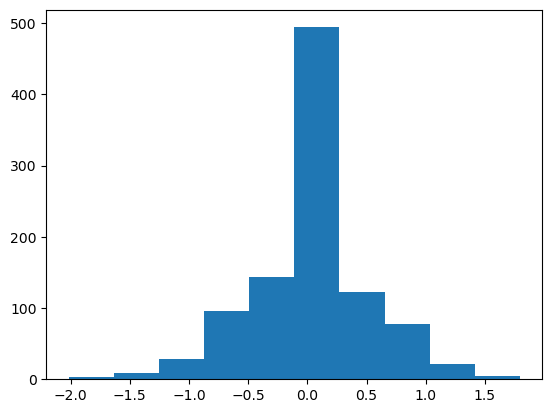

In [17]:
import matplotlib.pyplot as plt
plt.hist(align[100])

(array([  3.,  10.,  42., 119., 200., 326., 173.,  93.,  27.,   7.]),
 array([-2.15630269, -1.75183356, -1.34736443, -0.94289523, -0.5384261 ,
        -0.13395697,  0.27051216,  0.6749813 ,  1.07945049,  1.48391962,
         1.88838875]),
 <BarContainer object of 10 artists>)

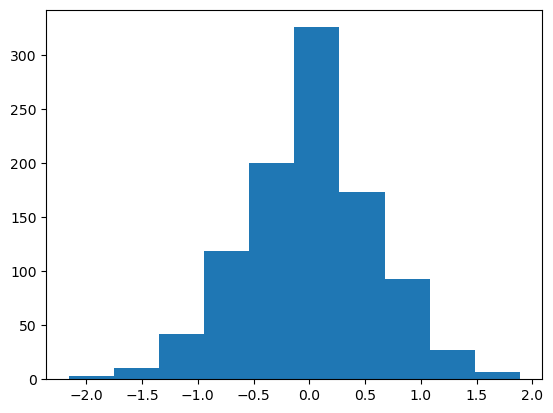

In [18]:
plt.hist(align[0])

In [13]:
len(align)

160